<a href="https://colab.research.google.com/github/BOrtizL/Proyecto-7-DataScience/blob/main/2_UDD_Proyecto_M7_Integraci%C3%B3n_y_limpieza_BarbaraOrtiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from datetime import datetime

In [25]:
#Se carga df con los datos del archivo CSV
df = pd.read_csv(r"/content/drive/MyDrive/Proyecto 7/data/Oscars-demographics-DFE.csv", encoding="ISO-8859-1")

# **EDA**

In [26]:
# Veamos que nos muestra el df
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [27]:
df.shape

(441, 27)

El DF contiene en total 27 columnas y 441 datos

In [28]:
nombre_columnas = df.columns
print("Nombre de columnas:", nombre_columnas)

Nombre de columnas: Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

Vamos a agregar columnas que aporten más variables al análisis:
La primera columna será: Género Cinematográfico, y la segunda será la característica de Género a la columna person.

Las películas serán clasificadas en: Aventura, Bélica, Biografía, Comedia, Crimen, Drama, Epica, Musical, Romance, Suspenso, Thriller y Western.

Las personas serán clasificadas como: Hombre y Mujer

In [30]:
# Diccionario de películas por tipo
movies_to_genre = {
    "Drama": [
        "12 Years a Slave", "7th Heaven", "A Free Soul", "A Letter to Three Wives", "A Patch of Blue", "A Place in the Sun", "A Streetcar Named Desire",
         "A Tree Grows in Brooklyn", "Affliction", "Alice Doesn't Live Here Anymore", "All About Eve", "All The King's Men", "All the President's Men",
         "American Beauty", "An Officer and a Gentleman", "Bad Girl", "Beginning", "Black Swan", "Blue Jasmine", "Blue Sky", "Born on the Fourth of July",
         "Boys Don't Cry", "Boys Town", "Brokeback Mountain", "Butterfield 8", "Cabaret", "Casablanca", "Cavalcade", "Charly", "Children of a Lesser God",
         "Come and Get It", "Come Back, Little Sheba", "Coming Home", "Cool Hand Luke", "Coquette", "Crazy Heart", "Cyrano de Bergerac", "Dangerous",
         "Darling", "Dead Man Walking", "Dreamgirls", "East of Eden", "Elmer Gantry", "Forrest Gump", "From Here to Eternity", "Gentleman's Agreement",
         "Ghost", "Giant", "Girl, Interrupted", "Glory", "Gone with the Wind", "Good Will Hunting", "Goodbye Mr. Chips", "Hamlet", "High Noon", "How Green Was My Valley",
         "Howards End", "Hud", "In Old Chicago", "Jezebel", "Johnny Belinda", "Judgement at Nuremberg", "Julia", "Kentucky", "Kiss of the Spider Woman",
         "Kitty Foyle", "Kramer vs. Kramer", "Leaving Las Vegas", "Les Misérables", "Lilies of the Field", "Marty", "Midnight Cowboy", "Mildred Pierce",
         "Million Dollar Baby", "Monster's Ball", "Mrs. Miniver", "My Fair Lady", "National Velvet", "Network", "None but the Lonely Heart", "Norma Rae",
         "Oliver!", "On Golden Pond", "One Flew over the Cuckoo's Nest", "Ordinary People", "Philadelphia", "Places in the Heart", "Platoon", "Precious", "the V.I.P.s",
         "Rain Man", "Rainman", "Reds", "Reversal of Fortune", "Rocky", "Room at the Top", "Ryan's Daughter", "Save the Tiger", "Sayonara", "Scent of a Woman",
         "Schindler's List", "Separate Tables", "Shine", "Slumdog Millionaire", "Sophie's Choice", "Stalag 17", "Sweet Bird of Youth", "Syriana", "Tender Mercies",
         "Terms of Endearment", "The Accidental Tourist", "The Accused", "The Artist", "The Bad and the Beautiful", "The Barefoot Contessa", "The Best Years of Our Lives",
         "The Blind Side", "The Champ", "The Cider House Rules", "The Color of Money", "The Constant Gardener", "The Country Girl", "The Diary of Anne Frank",
         "The Divine Lady", "The Divorcee", "The English Patient", "The Fighter", "The Fisher King", "The Good Earth", "The Graduate", "The Grapes of Wrath",
         "The Great Lie", "The Heiress", "The Help", "The Hours", "The Hurt Locker", "The King and I", "The Last Command", "The Last Emperor", "The Last King of Scotland",
         "The Last Picture Show", "The Life of Emile Zola", "The Lion in Winter", "The Lost Weekend", "The Miracle Worker", "The Paper Chase", "The Pianist",
         "The Piano", "The Prime of Miss Jean Brodie", "The Private Life of Henry VIII", "The Queen", "The Razor's Edge", "The Reader", "The Rose Tattoo",
         "The Sin of Madelon Claudet", "The Song of Bernadette", "The Sting", "The Subject Was Roses", "The Three Faces of Eve", "The Trip to Bountiful", "Les MisÌ©rables",
         "The Untouchables", "The V.I.P.s", "The Year of Living Dangerously", "There Will Be Blood", "They Shoot Horses, Don't They?", "To Each His Own", "All the King's Men",
         "To Kill a Mockingbird", "Traffic", "Training Day", "Two Women", "Viva Zapata!", "Wall Street", "Watch on the Rhine", "Who's Afraid of Virginia Woolf?",
         "Women in Love", "Written on the Wind", "Zorba the Greek", "Airport", "The Africa Queen", "One Flew Over the Cuckoo's Nest", "Oridnary People",],

    "Comedia": [
        "A Fish Called Wanda", "A Thousand Clowns", "A Touch of Class", "Adaptation", "Annie Hall", "Arthur", "As Good as It Gets", "Being There",
        "Born Yesterday", "Bullets Over Broadway", "Butterflies Are Free", "Cactus Flower", "California Suite", "Cat Ballou", "City Slickers", "Driving Miss Daisy",
        "Gigi", "Going My Way", "Guess Who's Coming to Dinner", "Hannah and Her Sisters", "Harry and Tonto", "Harvey", "It Happened One Night", "Jerry Maguire",
        "Life is Beautiful", "Little Miss Sunshine", "Mary Poppins", "Melvin and Howard", "Mighty Aphrodite", "Min and Bill", "Miracle on 34th Street",
        "Mister Roberts", "Moonstruck", "Morning Glory", "Mr. Deeds Goes to Town", "My Cousin Vinny", "Paper Moon", "Prizzi's Honor", "Roman Holiday",
        "Shampoo", "Silver Linings Playbook", "Skippy", "The Apartment", "The Awful Truth", "The Farmer's Daughter", "The Fortune Cookie", "The Goodbye Girl",
        "The More the Merrier", "The Philadelphia Story", "The Quiet Man", "The Sunshine Boys", "Tom Jones", "Tootsie", "Topkapi", "Two Arabian Knights",
        "Vicky Cristina Barcelona", "You Can't Take It with You", "As Good As It Gets",],

    "Crimen" : [
        "A Double Life", "Bonnie and Clyde", "Chicago", "Fargo", "Gaslight", "Good Fellas", "I Want To Live!", "In the Heat of the Night", "Johnny Eager",
        "Key Largo", "Klute", "L.A. Confidential", "Michael Clayton", "Murder on the Orient Express", "Mystic River", "No Country for Old Men",
        "On the Waterfront", "The Departed", "The French Connection", "The Godfather", "The Godfather Part II", "The Informer", "The Dark Knight", "The Fugitive",],

    "Aventura" : [
        "A Passage to India", "Anastasia", "Anthony Adverse", "Ben-Hur", "Captains Courageous", "Cocoon", "Cold Mountain", "Dances with Wolves", "For Whom the Bell Tolls",
        "Gladiator", "Inglourious Basterds", "Lawrence of Arabia", "Life of Pi", "The African Queen", "The Lord of the Rings: Return of the King",
         "The Treasure of the Sierra Madre", "Ben-hur",],

    "Bélica" : [
        "All Quiet on the Western Front", "Saving Private Ryan", "Sergeant York", "The Bridge on the River Kwai", "The Deer Hunter", "Twelve O'Clock High",],

    "Biografía" : [
        "A Beautiful Mind", "A Man for All Seasons", "Amadeus", "Braveheart", "Capote", "Coal Miner's Daughter", "Dallas Buyers Club", "Desraeli", "Ed Wood",
        "Erin Brockovich", "Funny Girl", "Gandhi", "Iris", "Lincoln", "Lust for Life", "Milk", "Monster", "My Left Foot", "Out of Africa", "Patton",
        "Pollock", "Raging Bull", "Ray", "The Aviator", "The Great Ziegfeld", "The Iron Lady", "The Killing Fields", "The King's Speech", "The Passionate Life of Edith Piaf",
        "The Story of Louis Pasteur", "Walk the Line", "Yankee Doodle Dandy", "A Man For All Seasons",],

    "Epica" : [
        "Spartacus",],

    "Musical" : [
        "The Sound of Music", "West Side Story",],

    "Romance" : [
        "Shakespeare in Love", "Titanic",],

    "Suspenso" : [
        "Misery", "Suspicion",],

    "Thriller" : [
        "Rosemary's Baby", "Silence of the Lambs", "The Silence of the Lambs", "The Usual Suspects",],

    "Western" : [
        "Django Unchained", "In Old Arizona", "Stagecoach", "The Big Country", "The Westerner", "True Grit", "Unforgiven",],

}

# Función para mapear películas a géneros
def map_movie_by_genre(movie):
    for genre, movies in movies_to_genre.items():
        if movie in movies:
            return genre
    return "Other"  # Si no se encuentra la película, se asigna como "Other"

# Aplicar la función al DataFrame para crear una nueva columna "genre"
df["genre"] = df["movie"].apply(map_movie_by_genre)



In [31]:
# Diccionario de personas por género
person_by_gender = {
    "Hombre" : [
        "Adrien Brody", "Al Pacino", "Alan Arkin", "Alec Guinness", "Ang Lee", "Anthony Hopkins", "Anthony Minghella",
        "Anthony Quinn", "Art Carney", "Barry Fitzgerald", "Barry Levinson", "Ben Johnson", "Ben Kingsley", "Benicio Del Toro",
        "Bernardo Bertolucci", "Billy Wilder", "Bing Crosby", "Bob Fosse", "Broderick Crawford", "Burl Ives", "Burt Lancaster",
        "Charles Coburn", "Charles Laughton", "Charlton Heston", "Chris Cooper", "Christian Bale", "Christoph Waltz", "Frank Capra",
        "Christopher Plummer", "Christopher Walken", "Clark Gable", "Cliff Robertson", "Clint Eastwood", "Colin Firth", "Woody Allen",
        "Cuba Gooding, Jr.", "Daniel Day-Lewis", "Danny Boyle", "David Lean", "David Niven", "Dean Jagger", "Delbert Mann", "Wallace Beery",
        "Denzel Washington", "Donald Crisp", "Dustin Hoffman", "Ed Begley, Sr.", "Edmond O'Brien", "Edmund Gwenn", "Elia Kazan",
        "Emil Jannings", "Ernest Borgnine", "Ethan Coen", "F. Murray Abraham", "Gary Cooper", "Gene Hackman", "Geoffrey Rush",
        "George Arliss", "George Burns", "George C. Scott", "George Chakiris", "George Clooney", "George Kennedy", "Francis Ford Coppola",
        "George Roy Hill", "George Sanders", "George Stevens", "Gig Young", "Gregory Peck", "Gwyneth Paltrow", "Haing S. Ngor",
        "Harold Russell", "Heath Ledger", "Henry Fonda", "Hilary Swank", "Hugh Griffith", "Humphrey Bogart", "Ingrid Bergman", "Victor McLaglen",
        "Jack Albertson", "Jack Lemmon", "Jack Nicholson", "Jack Palance", "James Cagney", "James Cameron", "James Coburn", "Warner Baxter",
        "James Dunn", "James L. Brooks", "Jamie Foxx", "Jared Leto", "Jason Robards", "Javier Bardem", "Jeff Bridges", "Victor Fleming",
        "Jeremy Irons", "Jerome Robbins", "Jim Broadbent", "Jimmy Stewart", "Jo Van Fleet", "Joel Coen", "Joel Grey", "William Friedkin",
        "John Ford", "John G. Avildsen", "John Gielgud", "John Houseman", "John Huston", "John Mills", "John Schlesinger", "Sydney Pollack",
        "John Wayne", "Jon Voight", "Jonathan Demme", "Jose Ferrer", "Joseph L. Mankiewicz", "Joseph Schildkraut", "Carol Reed", "William Hurt",
        "Josephine Hull", "Judi Dench", "Kevin Costner", "Kevin Kline", "Kevin Spacey", "Kirk Douglas", "Lee Marvin", "Lewis Milestone",
        "Leonardo DiCaprio", "Lionel Barrymore", "Louis Gossett, Jr.", "Mahershala Ali", "Marcello Mastroianni", "Mark Rylance", "William Holden",
        "Marlon Brando", "Martin Balsam", "Martin Landau", "Martin Scorsese", "Matthew McConaughey", "Maximilian Schell", "Fred Zinnemann",
        "Mel Gibson", "Melvyn Douglas", "Michael Caine", "Michael Cimino", "Michael Curtiz", "Michael Douglas", "Leo McCarey", "Franklin J. Schaffner",
        "Michel Hazanavicius", "Mike Nichols", "Milos Forman", "Morgan Freeman", "Natalie Portman", "Nicolas Cage", "William Wyler", "Fredric March",
        "Octavia Spencer", "Oliver Stone", "Orson Welles", "Paul Lukas", "Paul Muni", "Paul Newman", "Paul Scofield", "George Cukor", "Jean Dujardin",
        "Peter Finch", "Peter Jackson", "Peter Ustinov", "Philip Seymour Hoffman", "Ray Milland", "Red Buttons", "Frank Borzage", "Warren Beatty",
        "RenÌ©e Zellweger", "Rex Harrison", "Richard Attenborough", "Richard Dreyfuss", "Robert Benton", "Robert De Niro", "Leo McCarey",
        "Robert Donat", "Robert Duvall", "Robert Redford", "Robert Wise", "Robert Zemeckis", "Roberto Benigni", "Frank Lloyd", "Sam Mendes",
        "Robin Williams", "Rod Steiger", "Roman Polanski", "Ron Howard", "Ronald Colman", "Russell Crowe", "Sean Connery", "Norman Taurog", "Forest Whitaker",
        "Sean Penn", "Sidney Poitier", "Spencer Tracy", "Steven Soderbergh", "Steven Spielberg", "Sylvester Stallone", "Tim Robbins", "Laurence Olivier",
        "Timothy Hutton", "Tom Hanks", "Tom Hooper", "Tommy Lee Jones", "Tony Richardson", "Van Heflin", "Viggo Mortensen", "Vincente Minnelli",
        "Walter Brennan", "Thomas Mitchell", "Walter Brennan", "Walter Huston", "Karl Malden", "Frank Sinatra", "Walter Matthau", "Lou Gossett, Jr.", "Don Ameche", "Joe Pesci"
        "Yul Brynner", "Yul Brynner", "Joe Pesci",],

    "Mujer" : [
       "Alice Brady", "Angelina Jolie", "Anjelica Huston", "Anna Magnani", "Anna Paquin", "Anne Bancroft", "Anne Baxter", "Anne Hathaway", "Kathryn Bigelow",
       "Anne Revere", "Barbra Streisand", "Beatrice Straight", "Bette Davis", "Cate Blanchett", "Catherine Zeta-Jones", "Celeste Holm", "Charlize Theron", "Cher", "Claire Trevor",
       "Claudette Colbert", "Cloris Leachman", "Diane Keaton", "Dianne Wiest", "Donna Reed", "Dorothy Malone", "Elizabeth Taylor", "Ellen Burstyn", "Emma Thompson", "Frances McDormand", "Gale Sondergaard", "Geena Davis",
       "Geraldine Page", "Ginger Rogers", "Glenda Jackson", "Gloria Grahame", "Goldie Hawn", "Grace Kelly", "Greer Garson", "Halle Berry", "Hattie McDaniel", "Helen Hayes", "Helen Hunt", "Helen Mirren", "Holly Hunter",
       "Jane Darwell", "Jane Fonda", "Jane Wyman", "Janet Gaynor", "Jennifer Connelly", "Jennifer Hudson", "Jennifer Jones", "Jennifer Lawrence", "Jodie Foster", "Judy Holliday", "Julia Roberts", "Julie Andrews",
       "Julie Christie", "Juliette Binoche", "Kate Winslet", "Katharine Hepburn", "Kathy Bates", "Kim Basinger", "Linda Hunt", "Loretta Young", "Louise Fletcher", "Luise Rainer", "Lupita Nyong'o", "Maggie Smith",
       "Marcia Gay Harden", "Margaret Rutherford", "Marie Dressler", "Marion Cotillard", "Marisa Tomei", "Marlee Matlin", "Meryl Streep", "Mira Sorvino", "Miyoshi Umeki", "Mo'Nique", "Nicole Kidman",
       "Octavia Spencer", "Olivia de Havilland", "Olympia Dukakis", "Patricia Neal", "Patty Duke", "Penelope Cruz", "Rachel Weisz", "Renee Zellweger", "Rita Moreno", "Sally Field", "Sandra Bullock",
       "Sandy Dennis", "Shelley Winters", "Shirley Booth", "Shirley Jones", "Shirley MacLaine", "Susan Hayward", "Susan Sarandon", "Teresa Wright", "Tilda Swinton", "Vivien Leigh", "Whoopi Goldberg",
       "Mary Pickford", "Norma Shearer", "Joan Fontaine", "Joan Crawford", "Audrey Hepburn", "Joanne Woodward", "Simone Signoret", "Sophia Loren", "Liza Minnelli", "Faye Dunaway",
       "Sissy Spacek", "Jessica Tandy", "Jessica Lange", "Reese Witherspoon", "Fay Bainter", "Mary Astor", "Katina Paxinou", "Ethel Barrymore", "Mercedes McCambridge", "Kim Hunter",
       "Eva Marie Saint", "Wendy Hiller", "Lila Kedrova", "Estelle Parsons", "Ruth Gordon", "Eileen Heckart", "Tatum O'Neal", "Vanessa Redgrave", "Mary Steenburgen", "Maureen Stapleton",
       "Peggy Ashcroft", "Brenda Fricker", "Mercedes Ruehl", "Melissa Leo", "Mary Astor", "Lee Grant", "Faye Dunaway", "Joanne Woodward"],

}

# Función para mapear personas a géneros
def map_person_by_gender(person):
    for gender, people in person_by_gender.items():
        if person in people:
            return gender
    return "No clasificado"  # Si no se encuentra la persona, se asigna como "No clasificado"

# Aplicar la función al DataFrame para crear una nueva columna "gender"
df["gender"] = df["person"].apply(map_person_by_gender)



In [32]:
# Filtrar las filas sin clasificar en el DataFrame
peliculas_sin_clasificar = df[df['genre'] == 'No clasificado']["movie"].tolist()

# Mostrar las peliculas sin clasificar
if peliculas_sin_clasificar:
    print("Peliculas sin clasificar:")
    for nombre in peliculas_sin_clasificar:
        print(nombre)
else:
    print("Todos las peliculas han sido clasificados correctamente.")

Todos las peliculas han sido clasificados correctamente.


In [33]:
# Filtrar las filas sin clasificar en el DataFrame
nombres_sin_clasificar = df[df['gender'] == 'No clasificado']['person'].tolist()

# Mostrar los nombres sin clasificar
if nombres_sin_clasificar:
    print("Nombres sin clasificar:")
    for nombre in nombres_sin_clasificar:
        print(nombre)
else:
    print("Todos los nombres han sido clasificados correctamente.")

Todos los nombres han sido clasificados correctamente.


In [34]:
df.head(5) # Miramos como quedó el df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold,genre,gender
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN,Comedia,Hombre
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN,Drama,Hombre
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN,Bélica,Hombre
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN,Comedia,Hombre
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN,Drama,Hombre


In [35]:
# Se identifican si hay datos nulos en algunas columnas
df.isna().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 25
birthplace                         0
birthplace:confidence              0
date_of_birth                      0
date_of_birth:confidence           0
race_ethnicity                     0
race_ethnicity:confidence          0
religion                           0
religion:confidence                0
sexual_orientation                 0
sexual_orientation:confidence      0
year_of_award                      0
year_of_award:confidence           0
award                              0
biourl                             0
birthplace_gold                  432
date_of_birth_gold               433
movie                              0
person                             0
race_ethnicity_gold              439
religion_gold                    431
sexual_orientation_gold          438
year_of_award_gold               430
g

In [36]:
# Agrupamos por tipo de dato
df.dtypes.value_counts()

object     18
float64     7
int64       3
bool        1
Name: count, dtype: int64

Se identifica que de las 29 columnas, 18 son categóricas, 11 son numéricas y 1 es de tipo booleano

Hay 6 columnas que poseen muchos datos nulos y al analizar su data, la isma información la podemos encontrar en otras columnas.
Se toma la decision de eliminarlas del DF ya que no son un aporte para el análisis.

In [37]:
columns_to_drop = ["birthplace_gold", "date_of_birth_gold", "race_ethnicity_gold", "religion_gold", "sexual_orientation_gold", "year_of_award_gold"]

# Eliminar las columnas especificadas
df = df.drop(columns=columns_to_drop)



In [38]:
df.info() # Chequeamos nuevamente la información.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

**Ahora se analizará la data según sus variables más representativas**

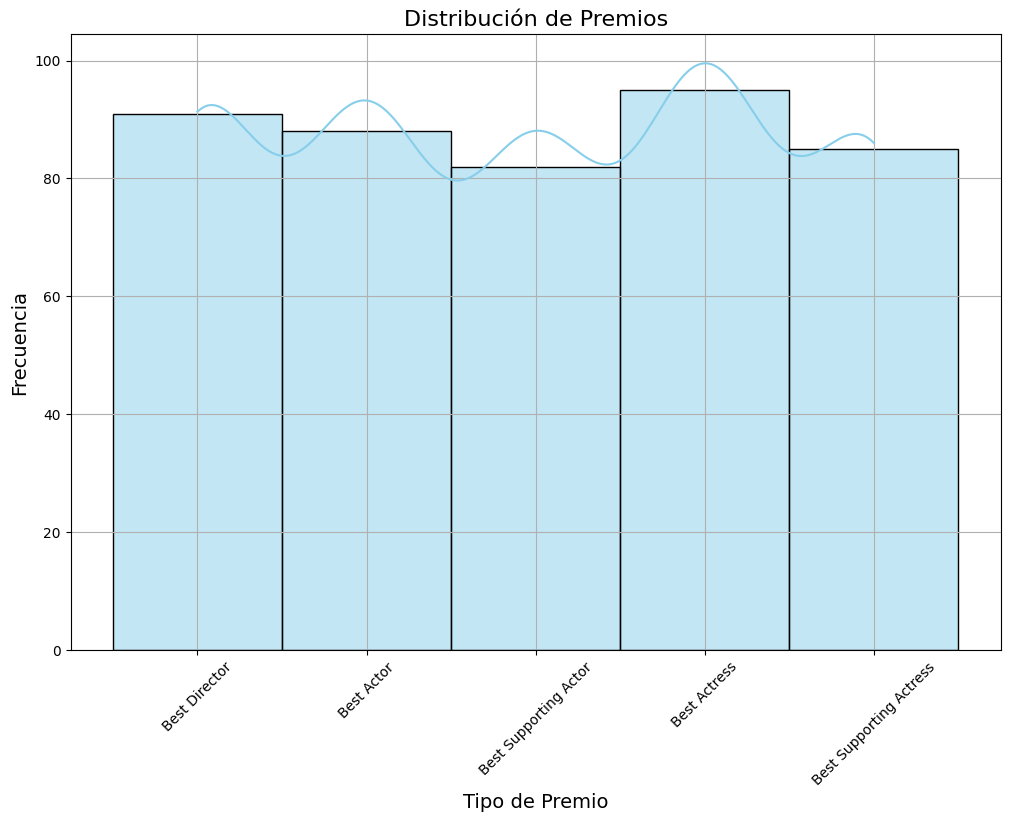

In [39]:
# Se genera un histograma considerando la columna "award"en el eje x
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
sns.histplot(data=df, x='award', kde=True, color='skyblue', edgecolor='black')  # Añade la línea kde para suavizar la distribución
plt.title('Distribución de Premios', fontsize=16)  # Añade un título
plt.xlabel('Tipo de Premio', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x para mejor visibilidad
plt.grid(True)  # Añade una cuadrícula para facilitar la lectura
plt.show()

**Observaciones:**
La distribución es uniforme, significa que todos los tipos de premios tienen frecuencias similares, destacando con poca diferencia *Best Actress*.

Picos y valles en la línea KDE indican concentraciones y dispersión en la distribución de los premios.

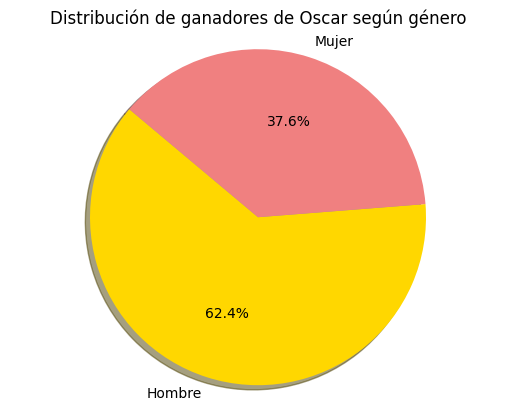

In [40]:
# Gráfico de distribución columna de "gender"
Frecuencia = df["gender"].value_counts()

# Etiquetas para cada sección
labels = Frecuencia.index
values = Frecuencia.values

# Colores para cada sección
colors = ["gold", "lightcoral"]

# Crear el gráfico de torta
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Ajustes adicionales
plt.axis('equal')  # Ajustar el aspecto para que el gráfico sea circular
plt.title('Distribución de ganadores de Oscar según género')

# Mostrar el gráfico
plt.show()

**Observaciones:**
La distribución según sexo muestra que son los *Hombres* los que ganan con mayor frecuencia un premio oscar.

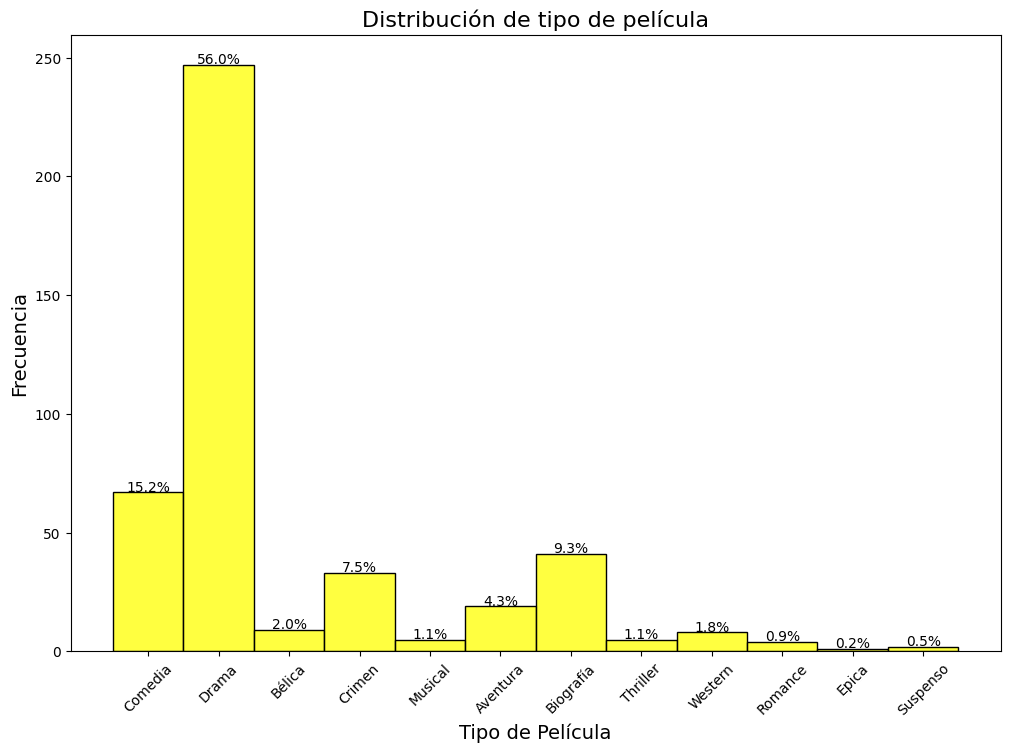

In [41]:
# Calcular el conteo de cada género cinematográfico
genre_counts = df['genre'].value_counts()

# Calcular los porcentajes
genre_total_count = genre_counts.sum()
genre_percentages = (genre_counts / genre_total_count) * 100

# Se genera un histograma sobre el tipo de película
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
ax = sns.histplot(data=df, x='genre', color='yellow', edgecolor='black')

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / genre_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center')

plt.title('Distribución de tipo de película', fontsize=16)  # Añade un título
plt.xlabel('Tipo de Película', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.show()

**Observación:**
Si analizamos la distribución según tipo de película, podemos identificar un gran sesgo, siendo las peliculas clasificadas en Drama las que presentan el 56% del total de películas que han ganado un oscar.

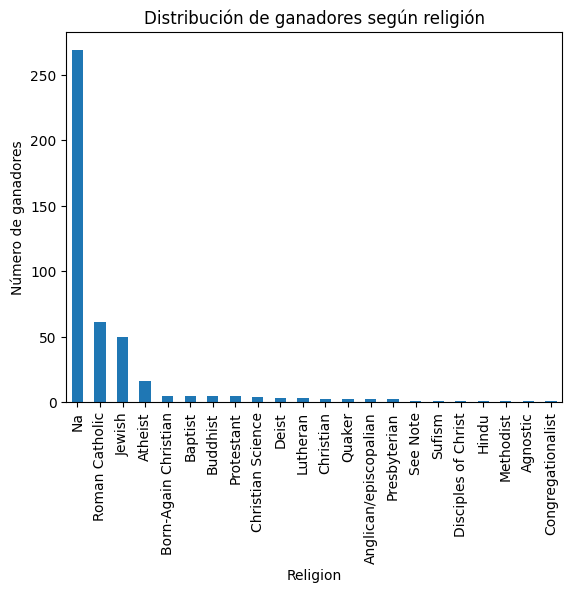

In [42]:
# Religión de los Ganadores
df["religion"].value_counts().plot(kind="bar")
plt.xlabel("Religion")
plt.ylabel("Número de ganadores")
plt.title("Distribución de ganadores según religión")
plt.show()

**Watch Out:** En religión podemos identificar que la información no está completa, siendo "Na" el que presenta mayor valor, superando las 250 personas con este dato faltante.
Para dar un adecuado resultado a esta categoría, se completará distribuyendo los valores "NA" entre el resto de las religiones existentes. De esta manera, la información será completada de forma más uniforme.
Se procede de esta manera ya que no hay ningun otro valor representativo, entonces no podemos ocupar la moda en este caso.

religion
Roman Catholic           74
Jewish                   63
Atheist                  29
Born-Again Christian     18
Baptist                  18
Buddhist                 18
Protestant               18
Christian Science        17
Deist                    16
Lutheran                 16
Anglican/episcopalian    15
Presbyterian             15
Christian                15
Quaker                   15
See Note                 14
Sufism                   14
Disciples of Christ      14
Hindu                    13
Methodist                13
Agnostic                 13
Congregationalist        13
Name: count, dtype: int64


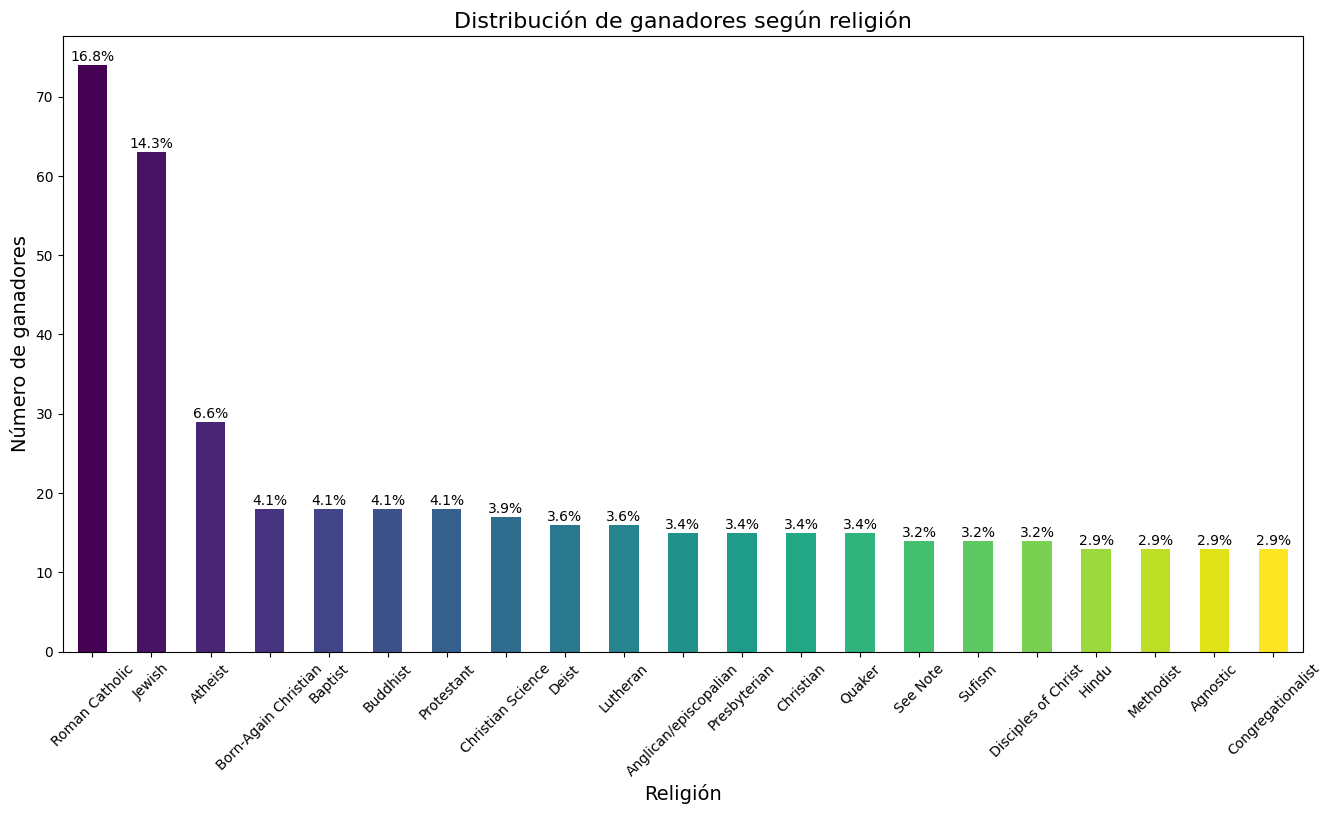

In [43]:
# Reemplazar "Na" por NaN
df["religion"] = df["religion"].replace("Na", np.nan)

# Contar el número de valores nulos en la columna "religion"
num_nas = df["religion"].isna().sum()

# Obtener las religiones existentes y sus conteos
religion_counts = df["religion"].value_counts()

# Crear una lista de religiones para distribuir los valores nulos
religions = religion_counts.index.tolist()

# Generar una lista de religiones para asignar a las filas nulas
distributed_religions = np.tile(religions, num_nas // len(religions) + 1)[:num_nas]

# Asignar las religiones distribuidas a las filas nulas
df.loc[df["religion"].isna(), "religion"] = distributed_religions

# Verificar el resultado del relleno
print(df["religion"].value_counts())

# Volver a obtener el conteo de valores únicos en la columna "religion"
religion_counts = df["religion"].value_counts()

# Calcular los porcentajes
religion_total_count = religion_counts.sum()
religion_percentages = (religion_counts / religion_total_count) * 100

# Establecer el tamaño de la figura antes de crear el gráfico
plt.figure(figsize=(16, 8))

# Crear el gráfico de barras con los colores especificados
ax = religion_counts.plot(kind="bar", color=plt.cm.viridis(np.linspace(0, 1, len(religion_counts))))

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / religion_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center')

# Añadir etiquetas y título
plt.xlabel("Religión", fontsize=14)
plt.ylabel("Número de ganadores", fontsize=14)
plt.title("Distribución de ganadores según religión", fontsize=16)
plt.xticks(rotation=45)
plt.show()

**Observaciones:**
Ahora no hay valores "NA" y se puede apreciar que hay dos religiones con mayor porcentaje de preferencias: Católica Romana (16,8%) y Judío (14,3%)

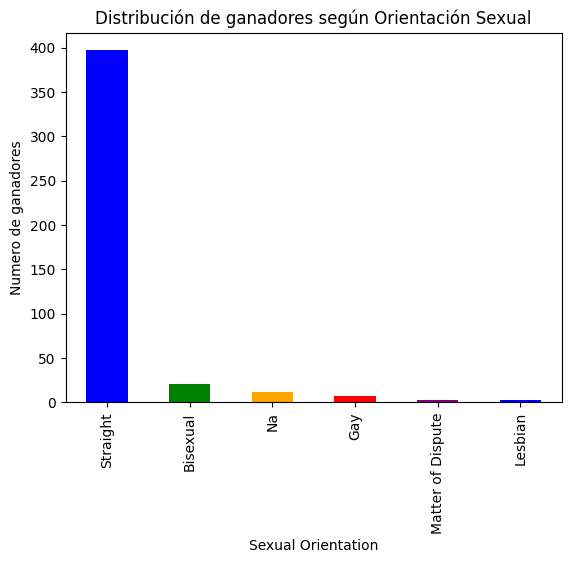

In [44]:
# Orientación sexual de los ganadores

# Primero se obtiene el conteo de los ganadores por cada orientación sexual.
counts = df["sexual_orientation"].value_counts()

# Luego, creamos un gráfico de barras apiladas.
counts.plot(kind="bar", stacked=True, color=['blue', 'green', 'orange', 'red', 'purple'])

# Ajustar el título y las etiquetas.
plt.title("Distribución de ganadores según Orientación Sexual")
plt.xlabel("Sexual Orientation")
plt.ylabel("Numero de ganadores")

plt.show()

**Watch Out:** Orientación sexual también tiene clasificación "Na". Se procede a completar este campo con la moda, ya que posee un % representativo de la data analizada.

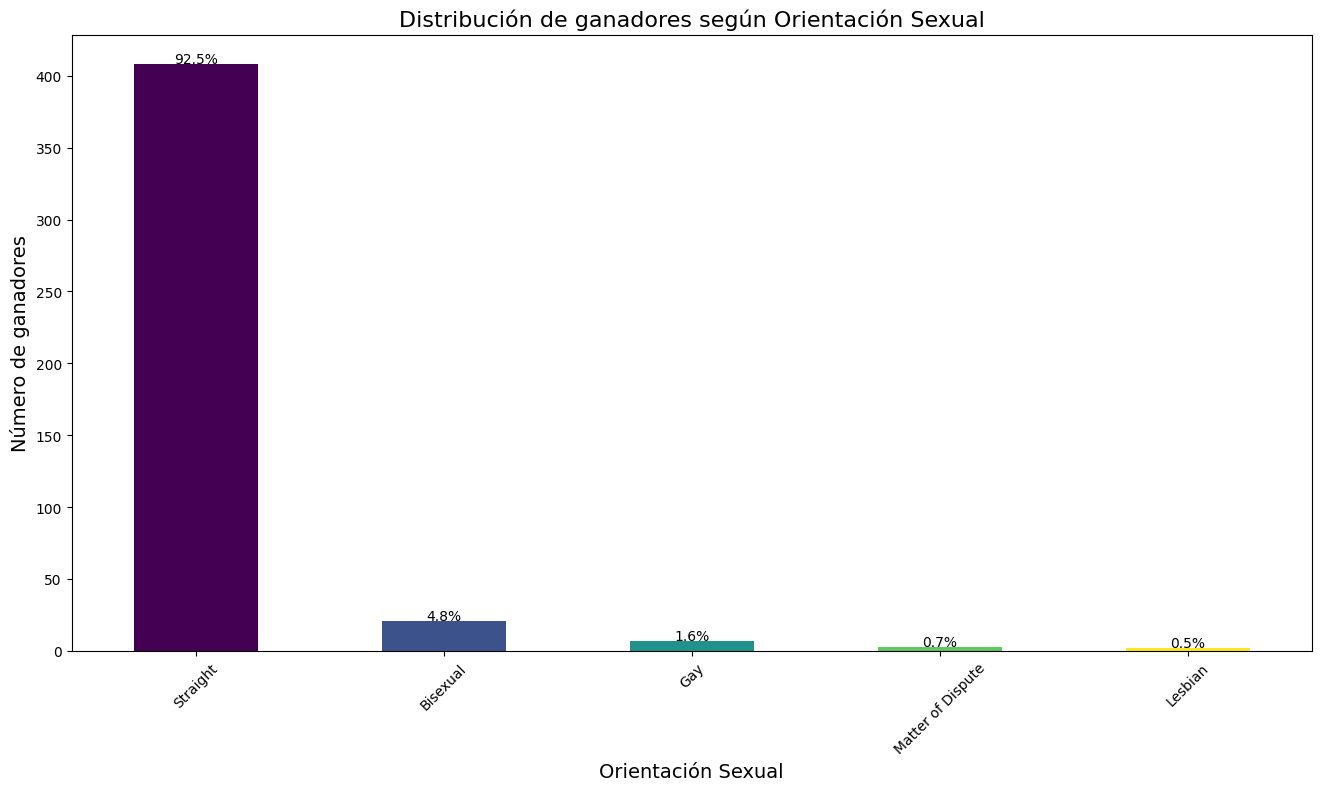

In [45]:
# Reemplazar "na" por NaN
df["sexual_orientation"] = df["sexual_orientation"].replace("Na", np.nan)

# Encontrar la orientación sexual más común
common_sexual_orientation = df["sexual_orientation"].mode()[0]

# Rellenar los valores nulos en la columna "sexual_orientation" con el dato más común
df["sexual_orientation"].fillna(common_sexual_orientation, inplace=True)

# Obtener el conteo de valores únicos en la columna "sexual_orientation"
sexual_orientation_counts = df["sexual_orientation"].value_counts()

# Calcular los porcentajes
sexual_orientation_total_count = sexual_orientation_counts.sum()
sexual_orientation_percentages = (sexual_orientation_counts / sexual_orientation_total_count) * 100

# Establecer el tamaño de la figura antes de crear el gráfico
plt.figure(figsize=(16, 8))

# Crear el gráfico de barras con los colores especificados
ax = sexual_orientation_counts.plot(kind="bar", color=plt.cm.viridis(np.linspace(0, 1, len(sexual_orientation_counts))))

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / sexual_orientation_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center')

# Ajustar el título y las etiquetas.
plt.title("Distribución de ganadores según Orientación Sexual", fontsize=16)
plt.xlabel("Orientación Sexual", fontsize=14)
plt.ylabel("Número de ganadores", fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Observación:**
Ahora todas las personas están asignadas con una orientación sexual, siendo la categoría *Heterosexual* la que posee mayor preferencia, alcanzando un 92,5% de las preferencias.

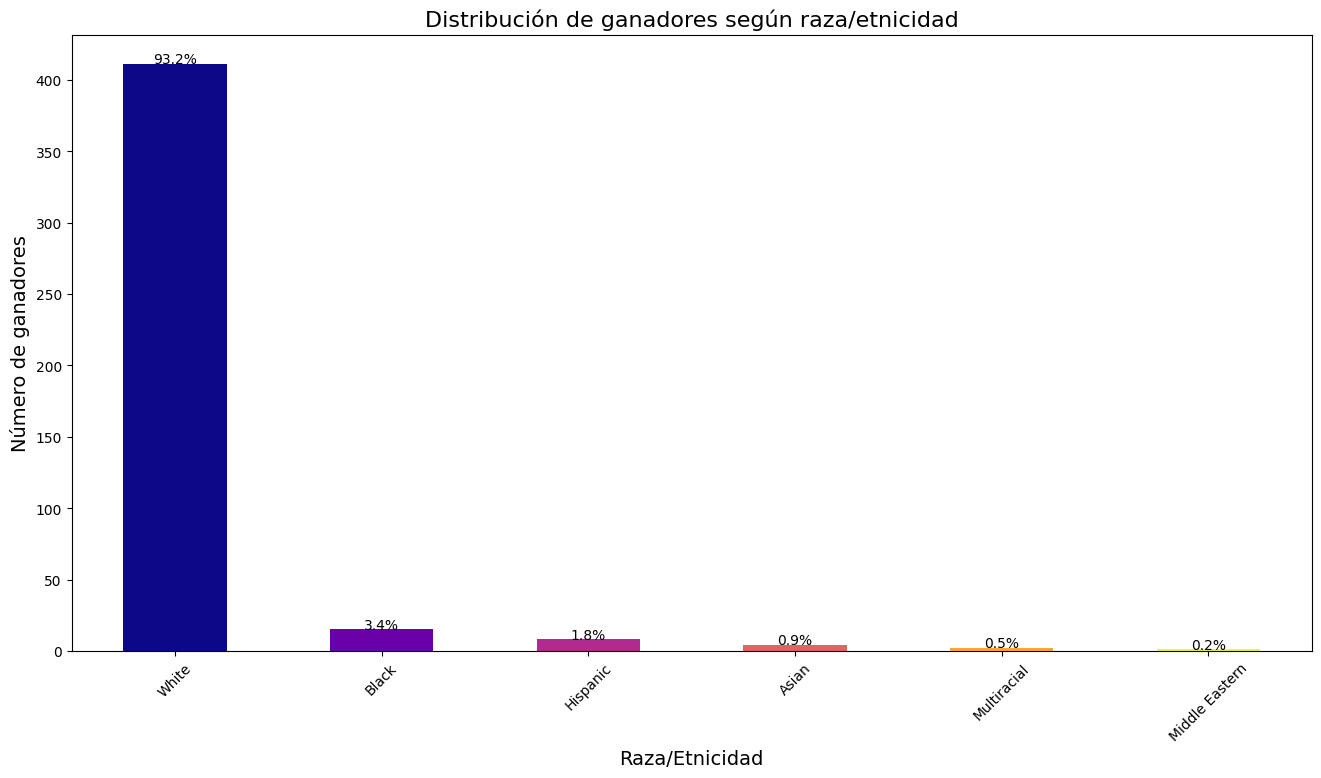

In [46]:
# Identificamos las distintas razas_étnicas de los ganadores

# Obtener el conteo de valores únicos en la columna "race_ethnicity"
race_ethnicity_counts = df["race_ethnicity"].value_counts()

# Calcular los porcentajes
race_ethnicity_total_count = race_ethnicity_counts.sum()
race_ethnicity_percentages = (race_ethnicity_counts / race_ethnicity_total_count) * 100

# Establecer el tamaño de la figura antes de crear el gráfico
plt.figure(figsize=(16, 8))

# Crear el gráfico de barras con los colores especificados
ax = race_ethnicity_counts.plot(kind="bar", color=plt.cm.plasma(np.linspace(0, 1, len(race_ethnicity_counts))))

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / race_ethnicity_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center')

# Ajustar el título y las etiquetas.
plt.title("Distribución de ganadores según raza/etnicidad", fontsize=16)
plt.xlabel("Raza/Etnicidad", fontsize=14)
plt.ylabel("Número de ganadores", fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Observación**: La gráfica muestra que mayoritariamente los ganadores pertenecen a la raza-étnica de personas blancas. Con esto identificamos un gran sesgo vs las otras étnias.

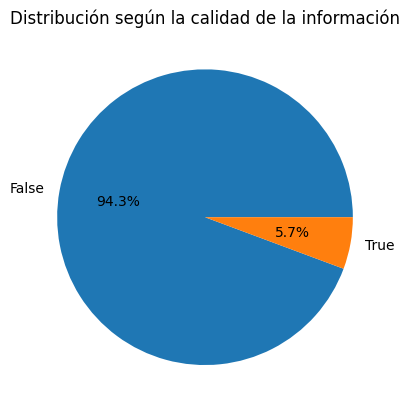

In [47]:
# Calidad de los datos
df["_golden"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribución según la calidad de la información")
plt.ylabel("")
plt.show()

**Observación:**
Utilizamos la columna "golden" para identificar aquella información que está clasificada como TRUE = confiable y FALSE = no confiable.
Podemos ver que hay un gran porcentaje de información, 94,3% que no es confiable.

In [48]:
# Agrupamos los datos según nivel de confiabilidad de la data
df["_trusted_judgments"].value_counts()

_trusted_judgments
3     416
91      5
87      3
86      3
75      2
84      2
76      2
82      1
81      1
95      1
90      1
62      1
89      1
85      1
92      1
Name: count, dtype: int64

**ESTRATEGIA**

Se identifica que hay 416 datos con puntuación 3 en su nivel de confiabilidad.En lugar de eliminar estos datos, se considera tratarlos de manera diferente en el análisis:

**Etiquetado y Filtrado**

Se etiquetan los datos con _trusted_judgments igual a 3 como "baja confianza" y analiza cómo se comportan en comparación con los datos altamente confiables (_trusted_judgments > 3).

**Análisis Separado**

Se realizará un análisis separados para diferentes niveles de confianza. Esto permitirá entender cómo varían los resultados en función de la confianza en los datos.


# **EDA de datos con alto grado de confiabilidad**

In [49]:
#Filtrar los datos en base al umbral de confianza
umbral_confianza = 3

# Datos altamente confiables
df_alta_confianza = df[df["_trusted_judgments"] > umbral_confianza]

# Datos moderadamente confiables
df_baja_confianza = df[df["_trusted_judgments"] == umbral_confianza]

In [50]:
# Ajustar la configuración de pandas para una mejor visualización
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.width', 1000)        # Ajustar el ancho de visualización
pd.set_option('display.colheader_justify', 'left')  # Justificar el encabezado de las columnas a la izquierda
pd.set_option('display.max_colwidth', None)  # No truncar el contenido de las columnas

In [51]:
# Mostrar el DataFrame filtrado con tabulate
print(tabulate(df_alta_confianza, headers='keys', tablefmt='psql'))

+-----+------------+-----------+---------------+----------------------+---------------------+-------------------------+-------------------------+-----------------+----------------------------+------------------+-----------------------------+-----------------------+-----------------------+----------------------+---------------------------------+-----------------+----------------------------+-------------------------+-------------------------------------------+----------------------------------+-------------------+-----------+----------+
|     |   _unit_id | _golden   | _unit_state   |   _trusted_judgments |   _last_judgment_at | birthplace              |   birthplace:confidence | date_of_birth   |   date_of_birth:confidence | race_ethnicity   |   race_ethnicity:confidence | religion              |   religion:confidence | sexual_orientation   |   sexual_orientation:confidence |   year_of_award |   year_of_award:confidence | award                   | biourl                                

In [52]:
df_alta_confianza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 21 to 430
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       25 non-null     int64  
 1   _golden                        25 non-null     bool   
 2   _unit_state                    25 non-null     object 
 3   _trusted_judgments             25 non-null     int64  
 4   _last_judgment_at              0 non-null      object 
 5   birthplace                     25 non-null     object 
 6   birthplace:confidence          25 non-null     float64
 7   date_of_birth                  25 non-null     object 
 8   date_of_birth:confidence       25 non-null     float64
 9   race_ethnicity                 25 non-null     object 
 10  race_ethnicity:confidence      25 non-null     float64
 11  religion                       25 non-null     object 
 12  religion:confidence            25 non-null     float64


In [53]:
# Definir la lista de columnas categóricas
cols_cat = ['_unit_state', 'birthplace', 'date_of_birth', 'race_ethnicity', 'religion',
            'sexual_orientation', 'award', 'biourl', 'movie', 'person', "genre", "gender"]

# Iterar sobre las columnas categóricas y verificar si existen en el DataFrame
for col in cols_cat:
    if col in df_alta_confianza.columns:
        print(f'Columna {col}: {df_alta_confianza[col].nunique()} subniveles')

Columna _unit_state: 1 subniveles
Columna birthplace: 20 subniveles
Columna date_of_birth: 24 subniveles
Columna race_ethnicity: 2 subniveles
Columna religion: 14 subniveles
Columna sexual_orientation: 2 subniveles
Columna award: 5 subniveles
Columna biourl: 24 subniveles
Columna movie: 24 subniveles
Columna person: 24 subniveles
Columna genre: 7 subniveles
Columna gender: 2 subniveles


**Observación:**
Se identifica que la columna _unit_state contienene sólo un nivel de clasificación y no entrega mucha información en el análisis. Se decide eliminar esta columna.

Además, se quitan las siguientes columnas porque su información no es relevante: _last_judgment_at (porque no contiene información), _unit_id, _golden, birthplace:confidence, date_of_birth:confidence, race_ethnicity:confidence, religion:confidence, sexual_orientation:confidence, year_of_award:confidence

In [54]:
# Eliminar columnas sin información relevante
new_columns_to_drop = ["_last_judgment_at", "_golden", "_unit_id", "_unit_state", "birthplace:confidence", "date_of_birth:confidence", "race_ethnicity:confidence", "religion:confidence", "sexual_orientation:confidence", "year_of_award:confidence"]
df_alta_confianza = df_alta_confianza.drop(columns=new_columns_to_drop)

In [55]:
#Nuevamente vemos cómo quedó la data
df_alta_confianza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 21 to 430
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _trusted_judgments  25 non-null     int64 
 1   birthplace          25 non-null     object
 2   date_of_birth       25 non-null     object
 3   race_ethnicity      25 non-null     object
 4   religion            25 non-null     object
 5   sexual_orientation  25 non-null     object
 6   year_of_award       25 non-null     int64 
 7   award               25 non-null     object
 8   biourl              25 non-null     object
 9   movie               25 non-null     object
 10  person              25 non-null     object
 11  genre               25 non-null     object
 12  gender              25 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.7+ KB


In [56]:
# Agrupamos por tipo de dato
df_alta_confianza.dtypes.value_counts()

object    11
int64      2
Name: count, dtype: int64

In [57]:
# Se verifica completitud de los datos
print(f"El % de completitud del df es, {df_alta_confianza.count().sum()/df_alta_confianza.size*100:.2f}%")

El % de completitud del df es, 100.00%


**Ahora se analizará la data según sus variables más representativas**

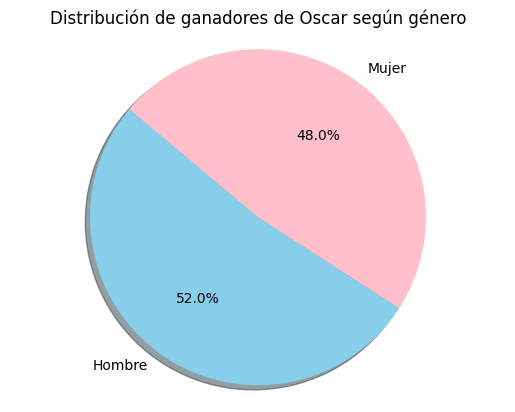

In [58]:
# Gráfico de distribución columna de "gender"
Frecuencia = df_alta_confianza["gender"].value_counts()

# Etiquetas para cada sección
labels = Frecuencia.index
values = Frecuencia.values

# Colores para cada sección
colors = ["skyblue", "pink"]

# Crear el gráfico de torta
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Ajustes adicionales
plt.axis('equal')  # Ajustar el aspecto para que el gráfico sea circular
plt.title('Distribución de ganadores de Oscar según género')

# Mostrar el gráfico
plt.show()

**Observación:**
Cuando analizamos la data de la información con alto grado de confiabilidad, la distribución entre Hombre y Mujer es mucho mas pareja, que cuando analisamos la data completa.

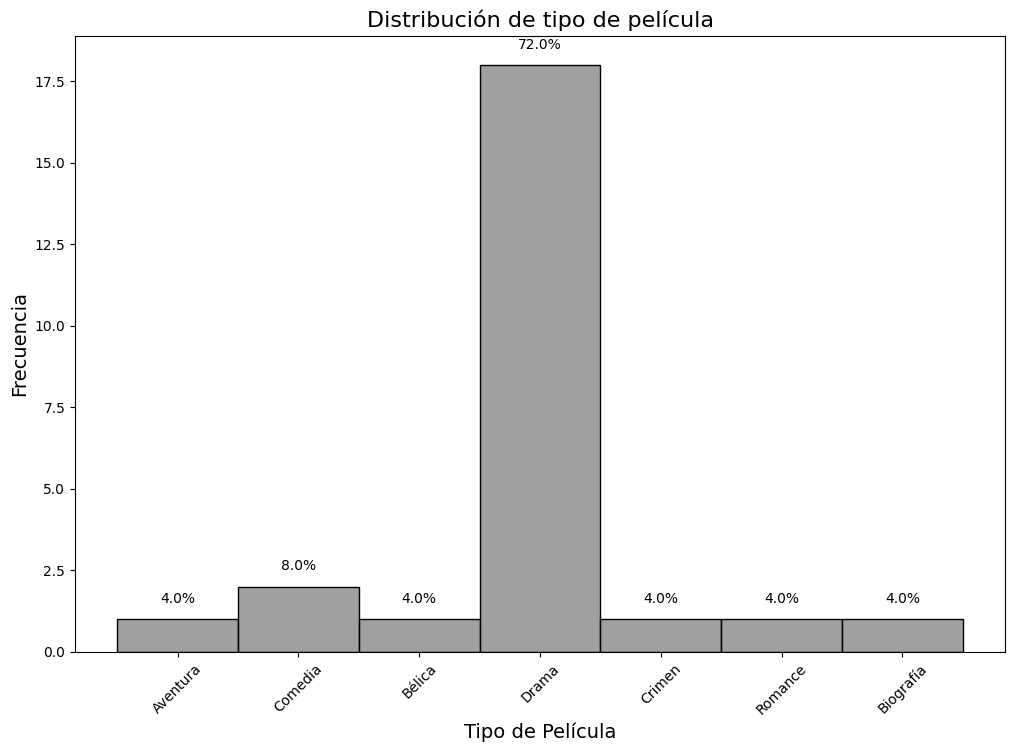

In [59]:
# Calcular el conteo de cada género cinematográfico
genre_ac_counts = df_alta_confianza['genre'].value_counts()

# Calcular los porcentajes
genre_ac_total_count = genre_ac_counts.sum()
genre_ac_percentages = (genre_ac_counts / genre_ac_total_count) * 100

# Se genera un histograma sobre el tipo de película
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
ax = sns.histplot(data=df_alta_confianza, x='genre', color='grey', edgecolor='black')

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / genre_ac_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center')

plt.title('Distribución de tipo de película', fontsize=16)  # Añade un título
plt.xlabel('Tipo de Película', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.show()

**Observación:**
Al analizar la distribución según tipo de película, la categoría *Drama* alcanza mayor porcentaje que cuando analizamos la data total, alcanzando 72% del total de las películas.

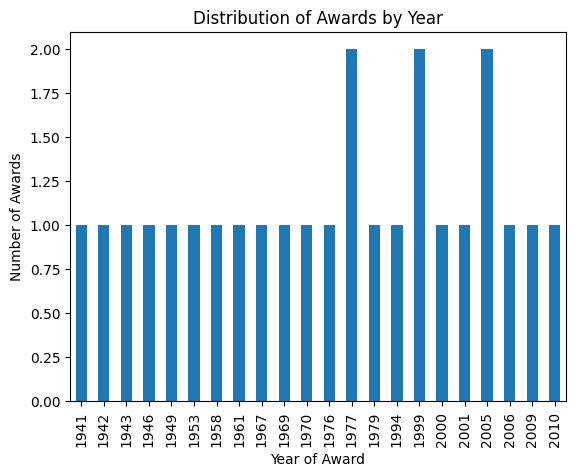

In [60]:
# Distribución de los Premios por Año
df_alta_confianza["year_of_award"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Year of Award")
plt.ylabel("Number of Awards")
plt.title("Distribution of Awards by Year")
plt.show()

Los años 1977, 1999 y 2005 son los años que empatan con 2 ganadores al oscar.

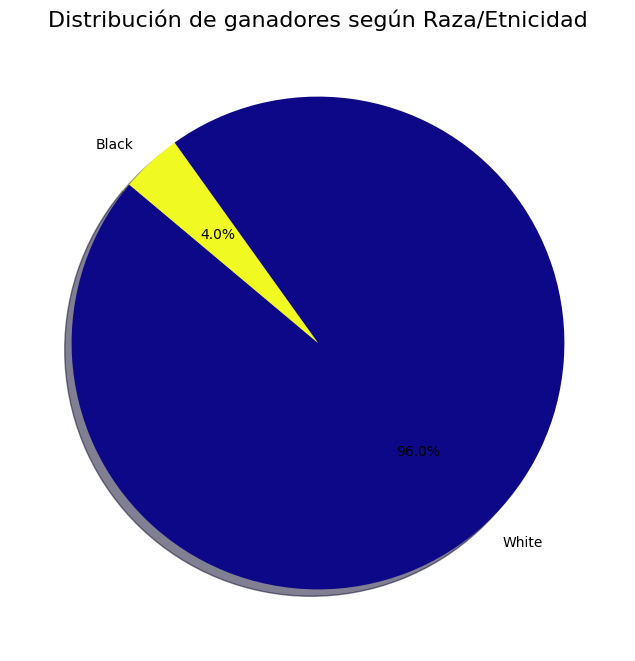

In [61]:
# Análisis de la Diversidad Étnica y Racial
# Obtener el conteo de valores únicos en la columna 'race_ethnicity'
df_alta_confianza_race_ethnicity_counts = df_alta_confianza['race_ethnicity'].value_counts()

# Calcular los porcentajes
ethnicity_ac_total_count = df_alta_confianza_race_ethnicity_counts.sum()
ethnicity_ac_percentages = (df_alta_confianza_race_ethnicity_counts / ethnicity_ac_total_count) * 100

# Establecer el tamaño de la figura antes de crear el gráfico
plt.figure(figsize=(16, 8))

# Definir una paleta de colores utilizando el colormap 'plasma'
colors = plt.cm.plasma(np.linspace(0, 1, len(df_alta_confianza_race_ethnicity_counts)))

# Crear el gráfico de torta
plt.pie(df_alta_confianza_race_ethnicity_counts, labels=df_alta_confianza_race_ethnicity_counts.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Ajustar el título
plt.title("Distribución de ganadores según Raza/Etnicidad", fontsize=16)

# Mostrar el gráfico
plt.show()

**Observación:**
En los datos de alta confiabilidad, sólo tenemos dos étnias distribuidas en todos los datos, siendo la raza blanca la que alcanza mayor participación, alcanzando 96% de los ganadores al oscar y sólo un 4% son negros.

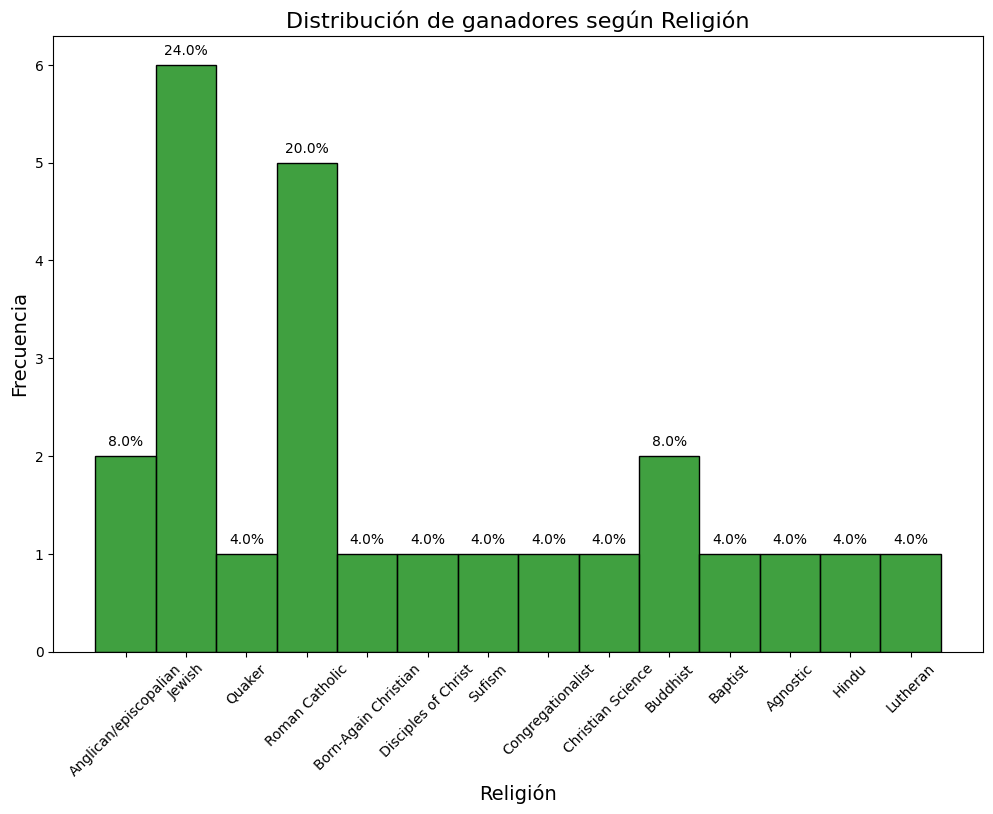

In [62]:
# Religión de los Ganadores

# Calcular el conteo de cada género cinematográfico
religion_ac_counts = df_alta_confianza['religion'].value_counts()

# Calcular los porcentajes
religion_ac_total_count = religion_ac_counts.sum()
religion_ac_percentages = (religion_ac_counts / religion_ac_total_count) * 100

# Se genera un histograma sobre el tipo de película
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
ax = sns.histplot(data=df_alta_confianza, x='religion', color='green', edgecolor='black')

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / religion_ac_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f"{percentage:.1f}%", ha='center')


plt.title('Distribución de ganadores según Religión', fontsize=16)  # Añade un título
plt.xlabel('Religión', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.show()

**Observación:**
En este caso, la religión Judía es la que representa a los ganadores al oscar en la data de alta confiabilidad, alcanzando el 24%, seguido de Católico Romano con 20%

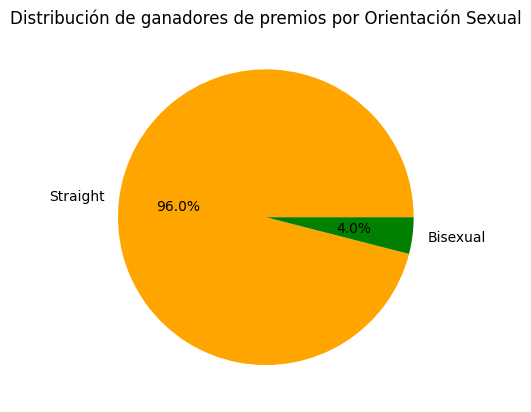

In [63]:
# Orientación Sexual
custom_colors = ['orange', 'green']

df_alta_confianza["sexual_orientation"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=custom_colors)
plt.title("Distribución de ganadores de premios por Orientación Sexual")
plt.ylabel("")  # Elimina la etiqueta del eje y
plt.show()

**Observación:**
La orientación sexual de la data con alto grado de confiabilidad es en un 96% heterosexual y sólo un 4% se considera bisexual. Sólo encontramos estas dos clasificaciones en esta data.

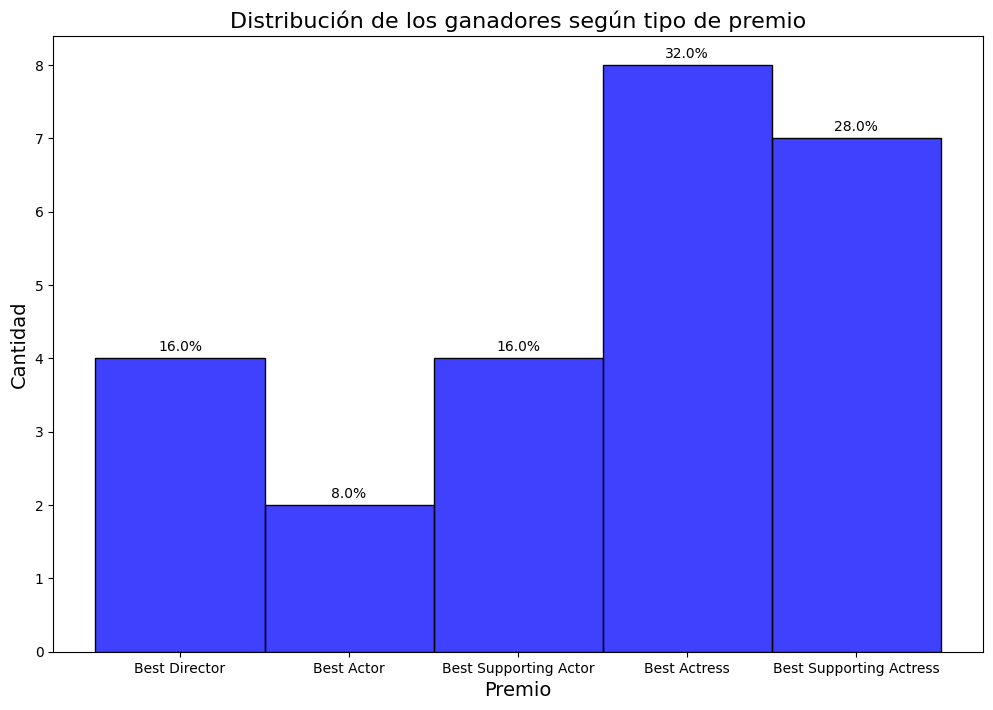

In [64]:
# Análisis de Categorías de Premios

# Calcular el conteo de cada género cinematográfico
Award_counts = df_alta_confianza['award'].value_counts()

# Calcular los porcentajes
total_Award_count = Award_counts.sum()
Award_percentages = (Award_counts / total_Award_count) * 100

# Se genera un histograma sobre el tipo de película
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
ax = sns.histplot(data=df_alta_confianza, x='award', color='blue', edgecolor='black')

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_Award_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f"{percentage:.1f}%", ha='center')

plt.xlabel("Premio", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.title('Distribución de los ganadores según tipo de premio', fontsize=16)
plt.show()

**Observación:**
La categoría con mayor cantidad de ganadores es Best Actress, con un 32%, seguido por Best Supporting Actress con un 28%. Esta distribución es distinta a lo que visualizamos cuando se analizó la data completa, donde la distribución era uniforme.

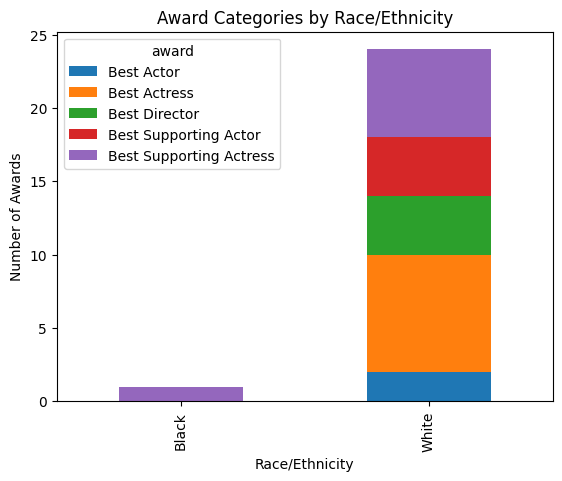

In [65]:
# Relación entre Categorías de Premios y Demografía
pd.crosstab(df_alta_confianza["race_ethnicity"], df_alta_confianza["award"]).plot(kind='bar', stacked=True)
plt.xlabel("Race/Ethnicity")
plt.ylabel("Number of Awards")
plt.title("Award Categories by Race/Ethnicity")
plt.show()

**Observación:**
Si distribuimos los premios según étnia, se identifica que la étnica de clasificación blanca tiene representantes en todas las categorías, en cambio la étnia negra sólo ha sido premiada en Best Supporting Actress

In [66]:
# Se guarda la data

import pickle

# Guardar el DataFrame en un archivo en Google Drive
ruta_archivo_drive = '/content/drive/My Drive/Proyecto 7/data/df_alta_confianza.pkl'
with open(ruta_archivo_drive, 'wb') as f:
    pickle.dump(df_alta_confianza, f)

In [67]:
# puede servir para despues sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

# **EDA de los datos con bajo grado de confiabilidad**

In [68]:
# Mostrar el DataFrame filtrado con tabulate
print(tabulate(df_baja_confianza, headers='keys', tablefmt='psql'))

+-----+------------+-----------+---------------+----------------------+---------------------+-------------------------------------------------+-------------------------+-----------------+----------------------------+------------------+-----------------------------+-----------------------+-----------------------+----------------------+---------------------------------+-----------------+----------------------------+-------------------------+-------------------------------------------+-------------------------------------------+------------------------+-----------+----------+
|     |   _unit_id | _golden   | _unit_state   |   _trusted_judgments | _last_judgment_at   | birthplace                                      |   birthplace:confidence | date_of_birth   |   date_of_birth:confidence | race_ethnicity   |   race_ethnicity:confidence | religion              |   religion:confidence | sexual_orientation   |   sexual_orientation:confidence |   year_of_award |   year_of_award:confidence | aw

In [69]:
df_baja_confianza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 440
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       416 non-null    int64  
 1   _golden                        416 non-null    bool   
 2   _unit_state                    416 non-null    object 
 3   _trusted_judgments             416 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     416 non-null    object 
 6   birthplace:confidence          416 non-null    float64
 7   date_of_birth                  416 non-null    object 
 8   date_of_birth:confidence       416 non-null    float64
 9   race_ethnicity                 416 non-null    object 
 10  race_ethnicity:confidence      416 non-null    float64
 11  religion                       416 non-null    object 
 12  religion:confidence            416 non-null    float64


In [70]:
# Definir la lista de columnas categóricas
cols_cat2 = ["_unit_state", "_last_judgment_at", 'birthplace', 'date_of_birth', 'race_ethnicity', 'religion',
            'sexual_orientation', 'award', 'biourl', 'movie', 'person', "genre", "gender"]

# Iterar sobre las columnas categóricas y verificar si existen en el DataFrame
for col in cols_cat2:
    if col in df_baja_confianza.columns:
        print(f'Columna {col}: {df_baja_confianza[col].nunique()} subniveles')

Columna _unit_state: 1 subniveles
Columna _last_judgment_at: 49 subniveles
Columna birthplace: 233 subniveles
Columna date_of_birth: 346 subniveles
Columna race_ethnicity: 6 subniveles
Columna religion: 21 subniveles
Columna sexual_orientation: 5 subniveles
Columna award: 5 subniveles
Columna biourl: 348 subniveles
Columna movie: 336 subniveles
Columna person: 348 subniveles
Columna genre: 12 subniveles
Columna gender: 2 subniveles


**Observación:**
Al igual que en el otro DF, se identifica que la columna **_unit_state** contienene sólo un nivel de clasificación y no entrega mucha información en el análisis. Se decide eliminar esta columna.

Además, se quitan las siguientes columnas porque su información no es relevante:
1. _unit_id,
2. _golden,
3. birthplace:confidence,
4. date_of_birth:confidence,
5. race_ethnicity:confidence,
6. religion:confidence,
7. year_of_award:confidence
8. sexual_orientation:confidence

In [71]:
# Eliminar columnas sin información relevante
new1_columns_to_drop = ["_golden", "_unit_id", "_unit_state", "birthplace:confidence", "date_of_birth:confidence", "race_ethnicity:confidence", "religion:confidence", "sexual_orientation:confidence", "year_of_award:confidence"]
df_baja_confianza = df_baja_confianza.drop(columns=new_columns_to_drop)

In [72]:
df_baja_confianza.info() # Miremos cómo quedó el df

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 440
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _trusted_judgments  416 non-null    int64 
 1   birthplace          416 non-null    object
 2   date_of_birth       416 non-null    object
 3   race_ethnicity      416 non-null    object
 4   religion            416 non-null    object
 5   sexual_orientation  416 non-null    object
 6   year_of_award       416 non-null    int64 
 7   award               416 non-null    object
 8   biourl              416 non-null    object
 9   movie               416 non-null    object
 10  person              416 non-null    object
 11  genre               416 non-null    object
 12  gender              416 non-null    object
dtypes: int64(2), object(11)
memory usage: 45.5+ KB


In [73]:
# Agrupamos por tipo de dato
df_baja_confianza.dtypes.value_counts()

object    11
int64      2
Name: count, dtype: int64

In [74]:
# Se verifica completitud de los datos
print(f"El % de completitud del df es, {df_baja_confianza.count().sum()/df_baja_confianza.size*100:.2f}%")

El % de completitud del df es, 100.00%


**Ahora se analizará la data según sus variables más representativas**

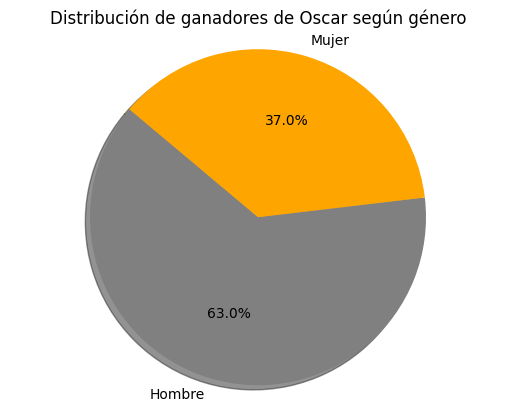

In [75]:
# Gráfico de distribución columna de "gender"
Frecuencia = df_baja_confianza["gender"].value_counts()

# Etiquetas para cada sección
labels = Frecuencia.index
values = Frecuencia.values

# Colores para cada sección
colors = ["gray", "orange"]

# Crear el gráfico de torta
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Ajustes adicionales
plt.axis('equal')  # Ajustar el aspecto para que el gráfico sea circular
plt.title('Distribución de ganadores de Oscar según género')

# Mostrar el gráfico
plt.show()

**Observación:**
En el df de baja confianza, la distribución de género es bien similar a lo que visualizamos cuando vimos la data completan, siendo la categoriía Hombre quien se lleva el mayor porcentaje, con 63% vs 37% que alcanzó Mujer.

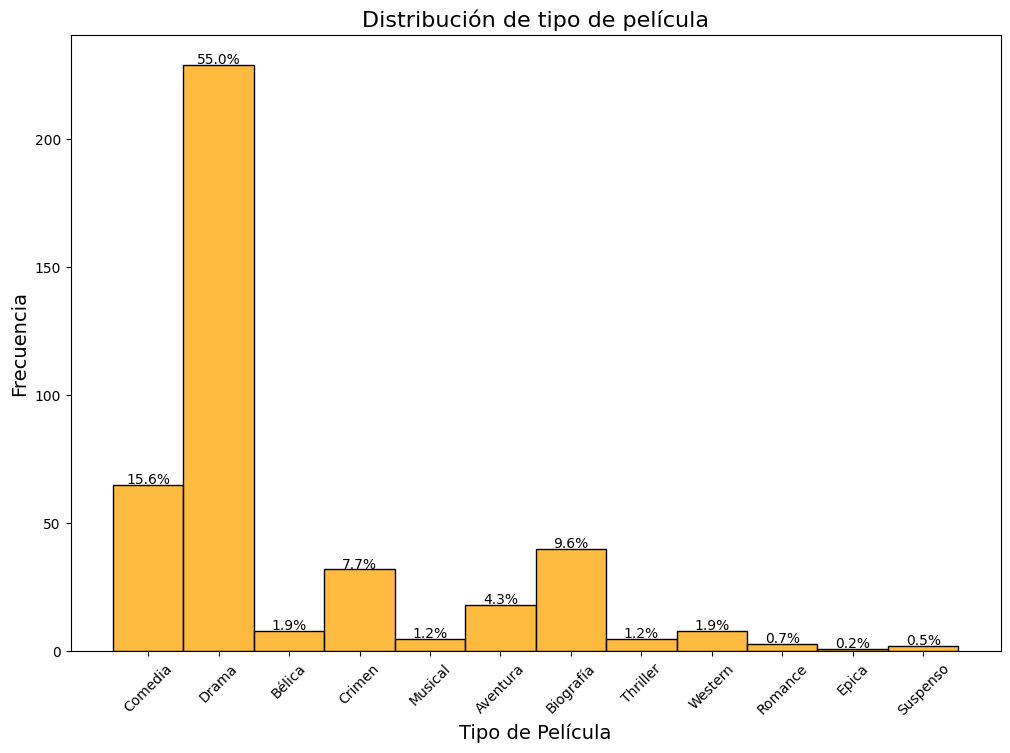

In [76]:
# Calcular el conteo de cada género cinematográfico
genre_bc_counts = df_baja_confianza['genre'].value_counts()

# Calcular los porcentajes
genre_bc_total_count = genre_bc_counts.sum()
genre_bc_percentages = (genre_bc_counts / genre_bc_total_count) * 100

# Se genera un histograma sobre el tipo de película
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
ax = sns.histplot(data=df_baja_confianza, x='genre', kde=False, color='orange', edgecolor='black')

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / genre_bc_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center')

plt.title('Distribución de tipo de película', fontsize=16)  # Añade un título
plt.xlabel('Tipo de Película', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.show()

**Observación:**
Al igual que en los df anteriores, la categoría Drama alcanza mayor porcentaje, con 55,3% del total de las películas.

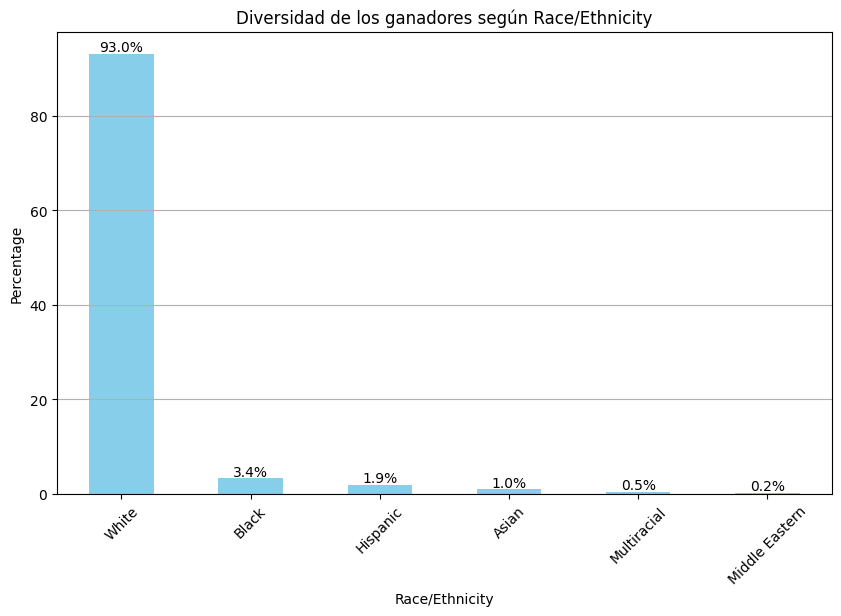

In [77]:
# Análisis de la Diversidad Étnica y Racial
# Calcular los conteos de cada categoría
counts = df_baja_confianza["race_ethnicity"].value_counts()

# Calcular los porcentajes
percentages = counts / counts.sum() * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
percentages.plot(kind="bar", color='skyblue')
plt.title("Diversidad de los ganadores según Race/Ethnicity")
plt.ylabel("Percentage")
plt.xlabel("Race/Ethnicity")

# Añadir etiquetas de porcentaje a las barras
for i, v in enumerate(percentages):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Observación:**
A diferencia de los datos de alta confianza, en estos datos existe diversos grupos étnicos, pero coincide en que predomina la raza etnica blanca con un 93% del total de personas.

<ipython-input-78-df64d97eb169>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


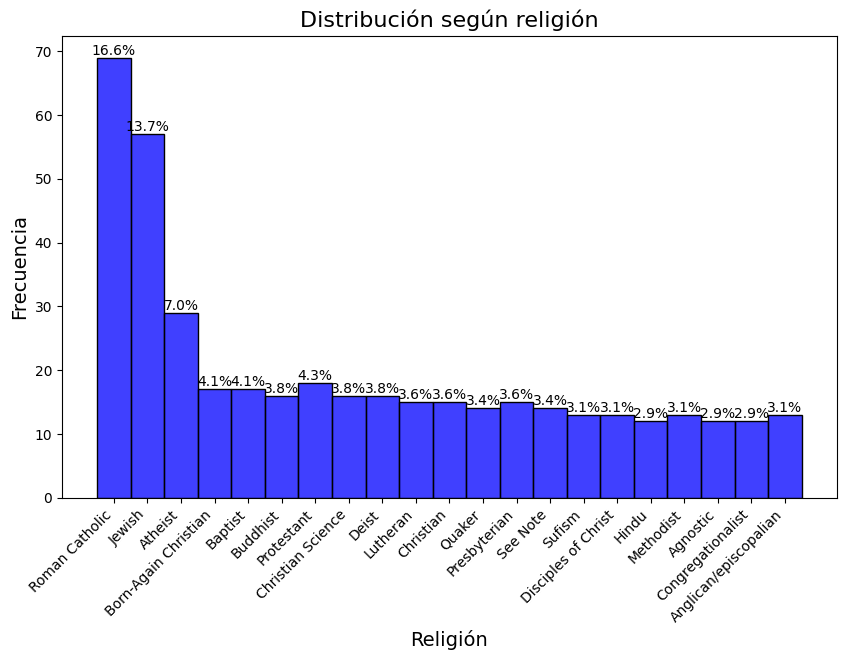

In [78]:
#Se genera un histograma sobre según religión

# Calcular el conteo de cada religión
religion_bc_counts = df_baja_confianza['religion'].value_counts()

# Calcular los porcentajes
religion_bc_total_count = religion_bc_counts.sum()
religion_bc_percentages = (religion_bc_counts / religion_bc_total_count) * 100

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
ax = sns.histplot(data=df_baja_confianza, x='religion', color='blue', edgecolor='black')

# Añadir etiquetas de porcentaje a las barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / religion_bc_total_count) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f"{percentage:.1f}%", ha='center')

plt.title('Distribución según religión', fontsize=16)  # Añade un título
plt.xlabel('Religión', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Frecuencia', fontsize=14)  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario

# Ajustar los nombres en el eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

**Observación:**
Al igual que en los otros DF, hay una preferencia por dos religiones: religión Catolica Romana con 16,4% y Judía con 13,8%.

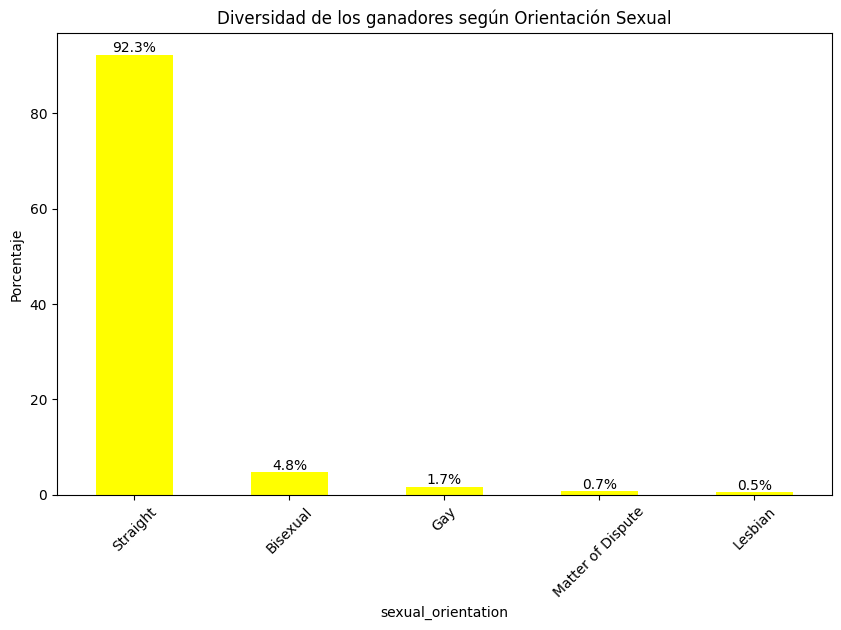

In [79]:
# Orientación Sexual
# Calcular los conteos de cada categoría
counts_bc_orientacion_sexual = df_baja_confianza["sexual_orientation"].value_counts()

# Calcular los porcentajes
percentages = counts_bc_orientacion_sexual / counts_bc_orientacion_sexual.sum() * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
percentages.plot(kind="bar", color='yellow')
plt.title("Diversidad de los ganadores según Orientación Sexual")
plt.ylabel("Porcentaje")
plt.xlabel("sexual_orientation")

# Añadir etiquetas de porcentaje a las barras
for i, v in enumerate(percentages):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.xticks(rotation=45)
plt.show()

**Observación:**
Tambíen en este df podemos encontrar a los heterosexuales con mayor porcentaje de participantes, alcanzando un 92,3% del total.

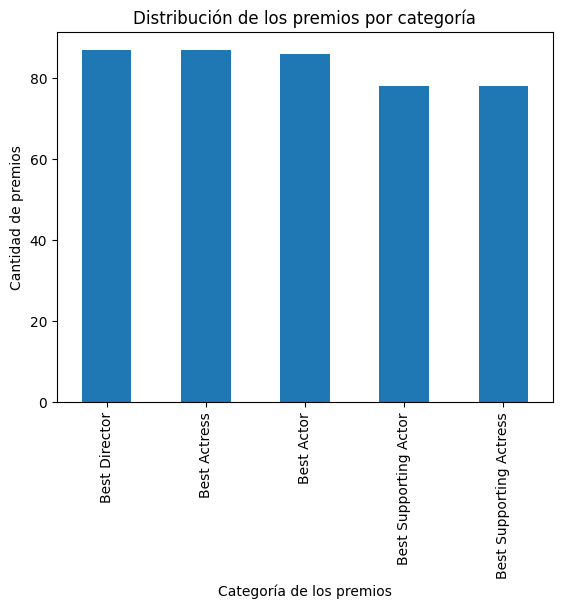

In [80]:
df_baja_confianza["award"].value_counts().plot(kind='bar')
plt.xlabel("Categoría de los premios")
plt.ylabel("Cantidad de premios")
plt.title('Distribución de los premios por categoría')
plt.show()

**Observación:**
En este df podemos encontrar que la distribución de los premios es mas parejo, siendo Best Director y Best Actress las que tienen un poco mas ventaja que el resto de las categorías.

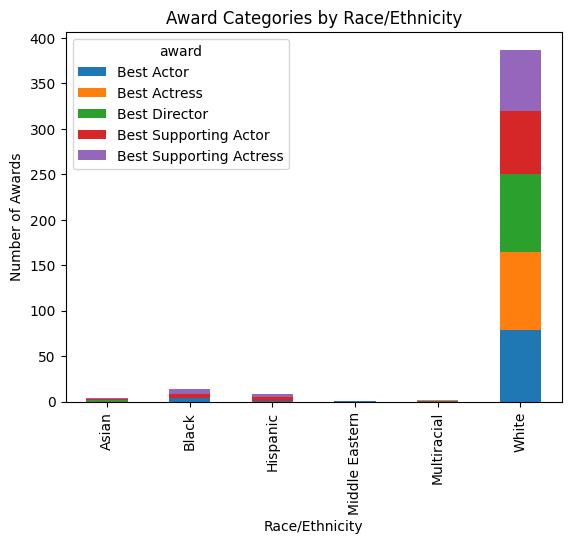

In [81]:
# Relación entre Categorías de Premios y Demografía
pd.crosstab(df_baja_confianza["race_ethnicity"], df_baja_confianza["award"]).plot(kind='bar', stacked=True)
plt.xlabel("Race/Ethnicity")
plt.ylabel("Number of Awards")
plt.title("Award Categories by Race/Ethnicity")
plt.show()

**Observación:**
Al igual que en los otros df, es la étnia de personas blancas las que se han llevado mayor cantidad de premios distribuidos en diferentes categorías.

In [82]:
# Calcular el conteo de cada valor en la columna "birthplace" en orden descendente
conteo_descendente = df_baja_confianza["birthplace"].value_counts(ascending=True)

# Imprimir el conteo descendente
print(conteo_descendente)

birthplace
Nevada, Mo                                          1
Fairport, Ny                                        1
Longview, Tx                                        1
Grayshott, Hampshire, England                       1
Rueil-Malmaison, Hauts-De-Seine, France             1
Uvalde, Tx                                          1
Arlington, Va                                       1
Elizabeth, Nj                                       1
Terrell, Tx                                         1
Savannah, Ga                                        1
North Sydney, Nova Scotia, Canada                   1
Vale of Glamorgan, Wales                            1
Laurel, Ne                                          1
Lima, Oh                                            1
Chiswick, London, England                           1
New Orleans, La                                     1
Hoboken, Nj                                         1
Reading, England                                    1
Jerusalem, Israel

In [83]:
# Filtrar por valores "Na"
filtered_df = df_baja_confianza[df_baja_confianza["birthplace"] == "Na"]

# Imprimir el DataFrame filtrado
print(filtered_df)

     _trusted_judgments birthplace date_of_birth race_ethnicity religion              sexual_orientation  year_of_award award                  biourl                                     movie                 person           genre     gender 
246  3                   Na         4-Oct-56      White                Roman Catholic  Straight           2010           Best Supporting Actor  http://www.nndb.com/people/455/000213813/  Inglourious Basterds  Christoph Waltz  Aventura  Hombre
249  3                   Na         4-Oct-56      White          Born-Again Christian  Straight           2013           Best Supporting Actor  http://www.nndb.com/people/455/000213813/      Django Unchained  Christoph Waltz   Western  Hombre


In [84]:
# Eliminar las filas donde la columna "birthplace" es "Na"
df_baja_confianza = df_baja_confianza[df_baja_confianza["birthplace"] != "Na"]

In [85]:
# Se decide eliminar la columna "_trusted_judgments", porque contiene sólo una variable y no entrega mayor relevancia a este análisis
df_baja_confianza = df_baja_confianza.drop(columns=["_trusted_judgments"])

In [86]:
# Se guardar el DataFrame en un archivo en Google Drive
ruta_archivo_drive = '/content/drive/My Drive/Proyecto 7/data/df_baja_confianza.pkl'
with open(ruta_archivo_drive, 'wb') as f:
    pickle.dump(df_baja_confianza, f)

**Conclusión:** En ambos DF se puede ver que en los datos hay sesgo en algunas variables, por ejemplo: Religión, Orientación Sexual, Etnia, Género y Clasificación Cinematográfica.

Para evitar que los diferentes rangos afecten el rendimiento y la interpretación del modelo, es necesario estandarizar las características mediante un StandardScaler

Estandarizar o normalizar las características antes de aplicar algoritmos de aprendizaje automático puede mejorar significativamente el rendimiento del modelo y la interpretabilidad. Esta práctica asegura que cada característica contribuye de manera equitativa al modelo, evitando que algunas características dominen simplemente por tener escalas más grandes.



